### **Import Library**

In [ ]:
pip install mapclassify

In [ ]:
# Import library

# Library pengekstrakan data dan visualisasi data
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import datasets, GeoDataFrame, read_file

# Import library untuk melakukan perhitungan matematika
import pandas as pd

# Library untuk algoritma K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score

# Library peta Interaktif
import folium
import matplotlib.pyplot as plt
from mapclassify import classify

### **Import File**

In [ ]:
# Import file geojson peta Jawa Tengah
jateng = gpd.read_file("JAWATENGAH.geojson")

In [ ]:
jateng.head()

id     Nama Kota/Kabupaten  \
0   7       KABUPATEN CILACAP   
1   2      KABUPATEN BANYUMAS   
2  20   KABUPATEN PURBALINGGA   
3   1  KABUPATEN BANJARNEGARA   
4  12       KABUPATEN KEBUMEN   

                                            geometry  
0  MULTIPOLYGON (((108.69310 -7.15192, 108.69341 ...  
1  MULTIPOLYGON (((109.50550 -7.53633, 109.50603 ...  
2  MULTIPOLYGON (((109.53228 -7.23074, 109.53233 ...  
3  MULTIPOLYGON (((109.91495 -7.19584, 109.91491 ...  
4  MULTIPOLYGON (((109.81203 -7.61213, 109.81192 ...

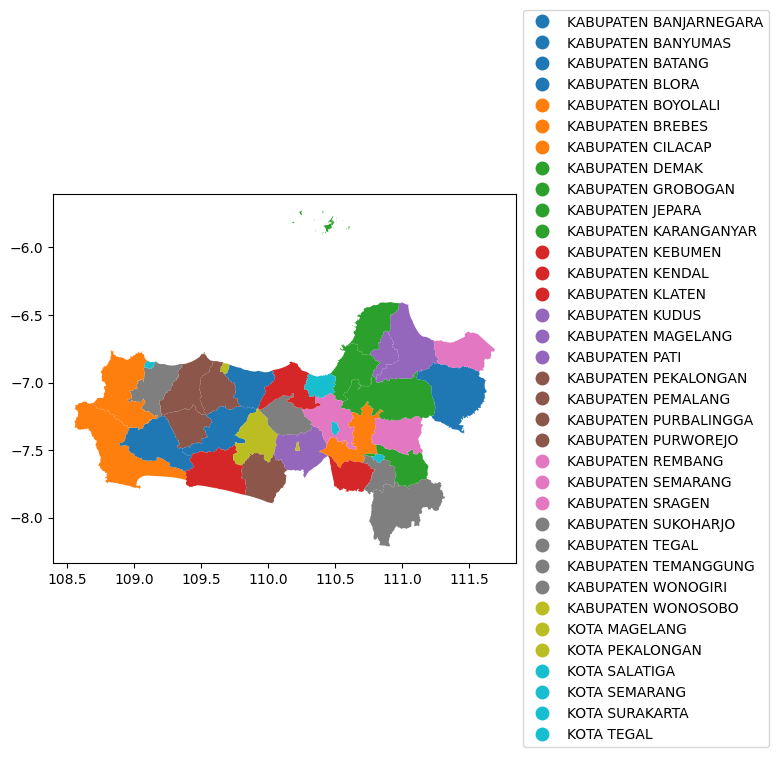

In [ ]:
# Visualisasi peta Jawa Tengah
ax = jateng.plot(column = 'Nama Kota/Kabupaten', categorical=True, legend = True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),'fmt': "{:.0f}"})

In [ ]:
# Import data csv bencana alam di Jawa Tengah
bencana = pd.read_csv('Data Bencana 2019-2023 FIX.csv')
bencana.head()

id                    KOTA  BANJIR  TANAH LONGSOR
0   1  KABUPATEN BANJARNEGARA       4             79
1   2      KABUPATEN BANYUMAS      42            130
2   3        KABUPATEN BATANG      14             13
3   4         KABUPATEN BLORA      30             10
4   5      KABUPATEN BOYOLALI       9             10

### **Mengabungkan Geojson dan CSV**

In [ ]:
# Menggabungkan peta dengan data csv
jateng2 = jateng.merge(penduduk,on = 'id')
jateng2.head()

id     Nama Kota/Kabupaten  \
0   7       KABUPATEN CILACAP   
1   2      KABUPATEN BANYUMAS   
2  20   KABUPATEN PURBALINGGA   
3   1  KABUPATEN BANJARNEGARA   
4  12       KABUPATEN KEBUMEN   

                                            geometry                    KOTA  \
0  MULTIPOLYGON (((108.69310 -7.15192, 108.69341 ...       KABUPATEN CILACAP   
1  MULTIPOLYGON (((109.50550 -7.53633, 109.50603 ...      KABUPATEN BANYUMAS   
2  MULTIPOLYGON (((109.53228 -7.23074, 109.53233 ...   KABUPATEN PURBALINGGA   
3  MULTIPOLYGON (((109.91495 -7.19584, 109.91491 ...  KABUPATEN BANJARNEGARA   
4  MULTIPOLYGON (((109.81203 -7.61213, 109.81192 ...       KABUPATEN KEBUMEN   

   BANJIR  TANAH LONGSOR  
0      72            112  
1      42            130  
2      14             42  
3       4             79  
4      14             25

In [ ]:
# Mengahpus kolom yang tidak digunakan
jateng2 = jateng2.drop(columns=['Nama Kota/Kabupaten','id'])

# Menganti nama kolom
jateng2.rename(columns={'KOTA': 'WILAYAH'}, inplace=True)

jateng2

geometry                 WILAYAH  \
0   MULTIPOLYGON (((108.69310 -7.15192, 108.69341 ...       KABUPATEN CILACAP   
1   MULTIPOLYGON (((109.50550 -7.53633, 109.50603 ...      KABUPATEN BANYUMAS   
2   MULTIPOLYGON (((109.53228 -7.23074, 109.53233 ...   KABUPATEN PURBALINGGA   
3   MULTIPOLYGON (((109.91495 -7.19584, 109.91491 ...  KABUPATEN BANJARNEGARA   
4   MULTIPOLYGON (((109.81203 -7.61213, 109.81192 ...       KABUPATEN KEBUMEN   
5   MULTIPOLYGON (((109.92246 -7.52109, 109.92423 ...     KABUPATEN PURWOREJO   
6   MULTIPOLYGON (((109.92475 -7.18860, 109.92484 ...      KABUPATEN WONOSOBO   
7   MULTIPOLYGON (((110.43872 -7.45342, 110.43929 ...      KABUPATEN MAGELANG   
8   MULTIPOLYGON (((110.74606 -7.14104, 110.74616 ...      KABUPATEN BOYOLALI   
9   MULTIPOLYGON (((110.45858 -7.54158, 110.45870 ...        KABUPATEN KLATEN   
10  MULTIPOLYGON (((110.77098 -7.54527, 110.77091 ...     KABUPATEN SUKOHARJO   
11  MULTIPOLYGON (((111.18204 -7.71237, 111.18242 ...      KABUPATEN WONOGIRI   
12  MULTIPOLYGON (((111.05316 -7.50905, 111.05316 ...   KABUPATEN KARANGANYAR   
13  MULTIPOLYGON (((111.14867 -7.26436, 111.14867 ...        KABUPATEN SRAGEN   
14  MULTIPOLYGON (((111.11526 -6.91626, 111.11497 ...      KABUPATEN GROBOGAN   
15  MULTIPOLYGON (((111.26346 -6.85537, 111.26350 ...         KABUPATEN BLORA   
16  MULTIPOLYGON (((111.69141 -6.75382, 111.69122 ...       KABUPATEN REMBANG   
17  MULTIPOLYGON (((111.23484 -6.69613, 111.23468 ...          KABUPATEN PATI   
18  MULTIPOLYGON (((110.90220 -6.62378, 110.90216 ...         KABUPATEN KUDUS   
19  MULTIPOLYGON (((110.62825 -6.57369, 110.62852 ...        KABUPATEN JEPARA   
20  MULTIPOLYGON (((110.75915 -6.79155, 110.76136 ...         KABUPATEN DEMAK   
21  MULTIPOLYGON (((110.56080 -7.45236, 110.56081 ...      KABUPATEN SEMARANG   
22  MULTIPOLYGON (((110.18722 -7.08097, 110.18729 ...    KABUPATEN TEMANGGUNG   
23  MULTIPOLYGON (((110.28483 -6.98898, 110.28457 ...        KABUPATEN KENDAL   
24  MULTIPOLYGON (((110.03000 -6.91240, 110.03002 ...        KABUPATEN BATANG   
25  MULTIPOLYGON (((109.59901 -6.84083, 109.59934 ...    KABUPATEN PEKALONGAN   
26  MULTIPOLYGON (((109.59587 -6.84175, 109.59587 ...      KABUPATEN PEMALANG   
27  MULTIPOLYGON (((109.11365 -6.89829, 109.11367 ...         KABUPATEN TEGAL   
28  MULTIPOLYGON (((108.83397 -6.77014, 108.83430 ...        KABUPATEN BREBES   
29  MULTIPOLYGON (((110.22558 -7.43771, 110.22643 ...           KOTA MAGELANG   
30  MULTIPOLYGON (((110.86103 -7.56714, 110.86072 ...          KOTA SURAKARTA   
31  MULTIPOLYGON (((110.48837 -7.29207, 110.48887 ...           KOTA SALATIGA   
32  MULTIPOLYGON (((110.47758 -7.08543, 110.47762 ...           KOTA SEMARANG   
33  MULTIPOLYGON (((109.71438 -6.86858, 109.71450 ...         KOTA PEKALONGAN   
34  MULTIPOLYGON (((109.16155 -6.84382, 109.16156 ...              KOTA TEGAL   

    BANJIR  TANAH LONGSOR  
0       72            112  
1       42            130  
2       14             42  
3        4             79  
4       14             25  
5       11             39  
6        7             39  
7        7            103  
8        9             10  
9       14              6  
10      12              2  
11      30             50  
12       5             30  
13      21             20  
14      58             14  
15      30             10  
16      11              8  
17      51              8  
18      32             50  
19      39             42  
20      25              0  
21      13             38  
22       8             97  
23      41             51  
24      14             13  
25      18              9  
26      25             26  
27      28             20  
28      45             77  
29       1              0  
30      14              4  
31       0              2  
32      48            130  
33      25              2  
34      16              0

### **Menentukan Cluster dengan Algoritma K-Means**

<Axes: xlabel='TANAH LONGSOR', ylabel='BANJIR'>

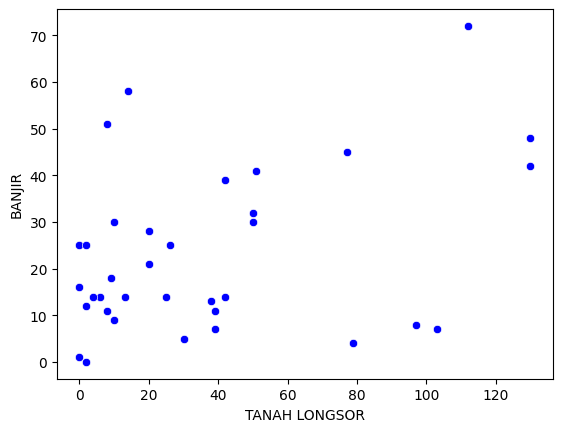

In [ ]:
sns.scatterplot(x= "TANAH LONGSOR", y="BANJIR",data = jateng2, color="blue")

## **Menentukan jumlah cluster optimal dengan menggunakan elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

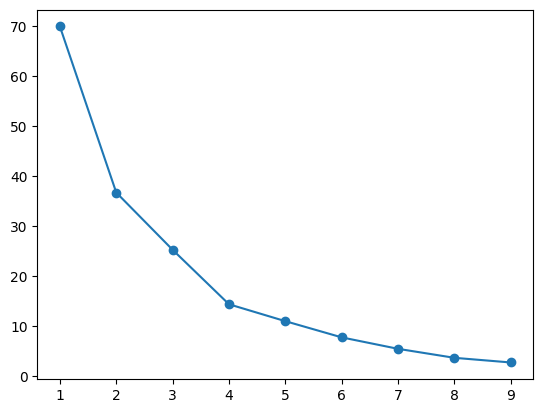

In [ ]:
# perhitungan elbow method
scaler=StandardScaler()
wcc=[]
for i in range (1,10):
    km=KMeans(n_clusters=i)
    km.fit(scaler.fit_transform(jateng2[["TANAH LONGSOR", "BANJIR"]]))
    wcc.append(km.inertia_)

#visualisasi elbow method
plt.plot(range(1,10), wcc, marker='o')

## **Memasukkan Tiap Titik Data kedalam Cluster**

In [ ]:
#init sesuai dengan pehitungan di atas
cluster=KMeans(n_clusters=4).fit_predict(scaler.fit_transform(jateng2[["TANAH LONGSOR", "BANJIR"]]))
jateng2["Cluster"]=cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='TANAH LONGSOR', ylabel='BANJIR'>

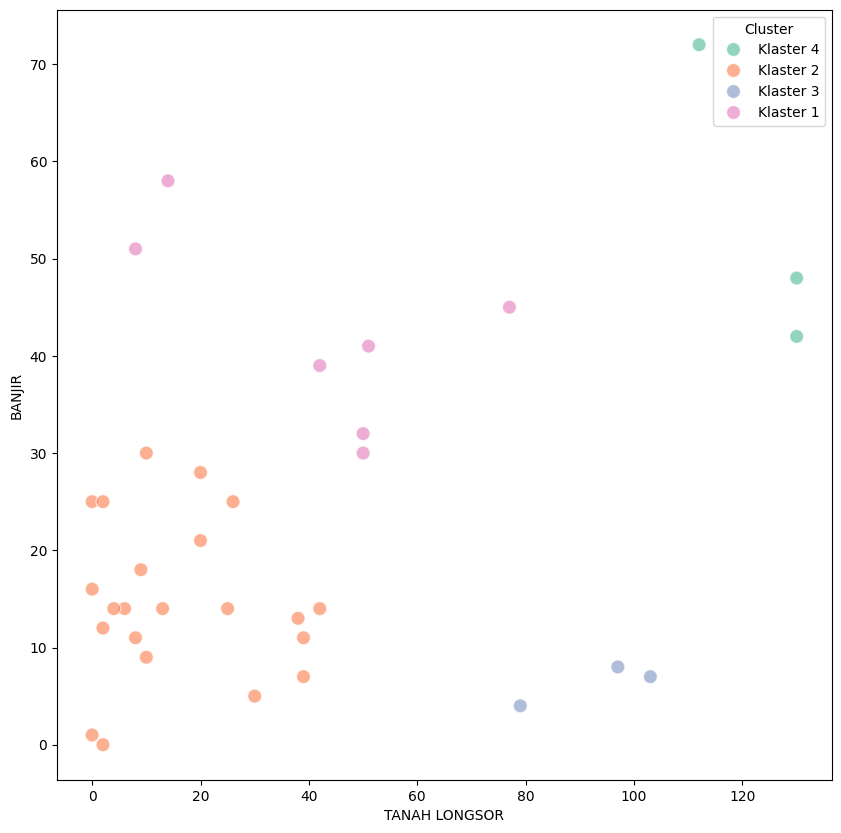

In [ ]:
# Visualisasi titik data yang sudah masuk ke dalam cluster

plt.figure(figsize=[10,10])
sns.scatterplot(data = jateng2,x= "TANAH LONGSOR", y= "BANJIR", hue = "Cluster" , palette="Set2", s = 100, alpha = 0.7)

In [ ]:
# Merubah 0,1,2, dan 3 menjadi nama cluster

klasifikasi = list()
for i in range(0,len(jateng2['Cluster'])):
    if jateng2['Cluster'][i] == 0:
        klasifikasi.append("Klaster 1")
    elif jateng2['Cluster'][i] == 1:
        klasifikasi.append("Klaster 2")
    elif jateng2['Cluster'][i] == 2:
        klasifikasi.append("Klaster 3")
    else:
        klasifikasi.append('Klaster 4')

klasifikasi

['Klaster 4',
 'Klaster 4',
 'Klaster 2',
 'Klaster 3',
 'Klaster 2',
 'Klaster 2',
 'Klaster 2',
 'Klaster 3',
 'Klaster 2',
 'Klaster 2',
 'Klaster 2',
 'Klaster 1',
 'Klaster 2',
 'Klaster 2',
 'Klaster 1',
 'Klaster 2',
 'Klaster 2',
 'Klaster 1',
 'Klaster 1',
 'Klaster 1',
 'Klaster 2',
 'Klaster 2',
 'Klaster 3',
 'Klaster 1',
 'Klaster 2',
 'Klaster 2',
 'Klaster 2',
 'Klaster 2',
 'Klaster 1',
 'Klaster 2',
 'Klaster 2',
 'Klaster 2',
 'Klaster 4',
 'Klaster 2',
 'Klaster 2']

In [ ]:
jateng2['Cluster']=klasifikasi
jateng2.head()

geometry                 WILAYAH  \
0  MULTIPOLYGON (((108.69310 -7.15192, 108.69341 ...       KABUPATEN CILACAP   
1  MULTIPOLYGON (((109.50550 -7.53633, 109.50603 ...      KABUPATEN BANYUMAS   
2  MULTIPOLYGON (((109.53228 -7.23074, 109.53233 ...   KABUPATEN PURBALINGGA   
3  MULTIPOLYGON (((109.91495 -7.19584, 109.91491 ...  KABUPATEN BANJARNEGARA   
4  MULTIPOLYGON (((109.81203 -7.61213, 109.81192 ...       KABUPATEN KEBUMEN   

   BANJIR  TANAH LONGSOR    Cluster  
0      72            112  Klaster 4  
1      42            130  Klaster 4  
2      14             42  Klaster 2  
3       4             79  Klaster 3  
4      14             25  Klaster 2

<Axes: >

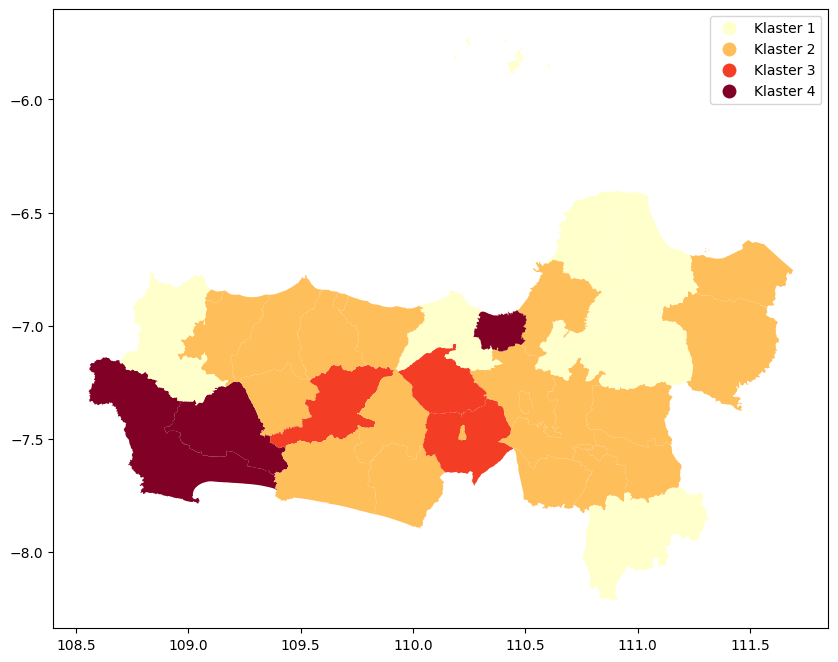

In [ ]:
# Visualisasi peta setelah di Clustering

jateng2.plot(column='Cluster', cmap='YlOrRd', figsize=(10,10), legend=True)

### **Visualisasi Peta Interaktif**

In [ ]:
jateng2.explore(
    column="Cluster",
    tooltip="WILAYAH",
    popup=True,
    tiles="CartoDB positron",
    cmap="Set3",
    style_kwds=dict(color="black")
)

In [ ]:
jateng2

geometry                 WILAYAH  \
0   MULTIPOLYGON (((108.69310 -7.15192, 108.69341 ...       KABUPATEN CILACAP   
1   MULTIPOLYGON (((109.50550 -7.53633, 109.50603 ...      KABUPATEN BANYUMAS   
2   MULTIPOLYGON (((109.53228 -7.23074, 109.53233 ...   KABUPATEN PURBALINGGA   
3   MULTIPOLYGON (((109.91495 -7.19584, 109.91491 ...  KABUPATEN BANJARNEGARA   
4   MULTIPOLYGON (((109.81203 -7.61213, 109.81192 ...       KABUPATEN KEBUMEN   
5   MULTIPOLYGON (((109.92246 -7.52109, 109.92423 ...     KABUPATEN PURWOREJO   
6   MULTIPOLYGON (((109.92475 -7.18860, 109.92484 ...      KABUPATEN WONOSOBO   
7   MULTIPOLYGON (((110.43872 -7.45342, 110.43929 ...      KABUPATEN MAGELANG   
8   MULTIPOLYGON (((110.74606 -7.14104, 110.74616 ...      KABUPATEN BOYOLALI   
9   MULTIPOLYGON (((110.45858 -7.54158, 110.45870 ...        KABUPATEN KLATEN   
10  MULTIPOLYGON (((110.77098 -7.54527, 110.77091 ...     KABUPATEN SUKOHARJO   
11  MULTIPOLYGON (((111.18204 -7.71237, 111.18242 ...      KABUPATEN WONOGIRI   
12  MULTIPOLYGON (((111.05316 -7.50905, 111.05316 ...   KABUPATEN KARANGANYAR   
13  MULTIPOLYGON (((111.14867 -7.26436, 111.14867 ...        KABUPATEN SRAGEN   
14  MULTIPOLYGON (((111.11526 -6.91626, 111.11497 ...      KABUPATEN GROBOGAN   
15  MULTIPOLYGON (((111.26346 -6.85537, 111.26350 ...         KABUPATEN BLORA   
16  MULTIPOLYGON (((111.69141 -6.75382, 111.69122 ...       KABUPATEN REMBANG   
17  MULTIPOLYGON (((111.23484 -6.69613, 111.23468 ...          KABUPATEN PATI   
18  MULTIPOLYGON (((110.90220 -6.62378, 110.90216 ...         KABUPATEN KUDUS   
19  MULTIPOLYGON (((110.62825 -6.57369, 110.62852 ...        KABUPATEN JEPARA   
20  MULTIPOLYGON (((110.75915 -6.79155, 110.76136 ...         KABUPATEN DEMAK   
21  MULTIPOLYGON (((110.56080 -7.45236, 110.56081 ...      KABUPATEN SEMARANG   
22  MULTIPOLYGON (((110.18722 -7.08097, 110.18729 ...    KABUPATEN TEMANGGUNG   
23  MULTIPOLYGON (((110.28483 -6.98898, 110.28457 ...        KABUPATEN KENDAL   
24  MULTIPOLYGON (((110.03000 -6.91240, 110.03002 ...        KABUPATEN BATANG   
25  MULTIPOLYGON (((109.59901 -6.84083, 109.59934 ...    KABUPATEN PEKALONGAN   
26  MULTIPOLYGON (((109.59587 -6.84175, 109.59587 ...      KABUPATEN PEMALANG   
27  MULTIPOLYGON (((109.11365 -6.89829, 109.11367 ...         KABUPATEN TEGAL   
28  MULTIPOLYGON (((108.83397 -6.77014, 108.83430 ...        KABUPATEN BREBES   
29  MULTIPOLYGON (((110.22558 -7.43771, 110.22643 ...           KOTA MAGELANG   
30  MULTIPOLYGON (((110.86103 -7.56714, 110.86072 ...          KOTA SURAKARTA   
31  MULTIPOLYGON (((110.48837 -7.29207, 110.48887 ...           KOTA SALATIGA   
32  MULTIPOLYGON (((110.47758 -7.08543, 110.47762 ...           KOTA SEMARANG   
33  MULTIPOLYGON (((109.71438 -6.86858, 109.71450 ...         KOTA PEKALONGAN   
34  MULTIPOLYGON (((109.16155 -6.84382, 109.16156 ...              KOTA TEGAL   

    BANJIR  TANAH LONGSOR    Cluster  
0       72            112  Klaster 4  
1       42            130  Klaster 4  
2       14             42  Klaster 2  
3        4             79  Klaster 3  
4       14             25  Klaster 2  
5       11             39  Klaster 2  
6        7             39  Klaster 2  
7        7            103  Klaster 3  
8        9             10  Klaster 2  
9       14              6  Klaster 2  
10      12              2  Klaster 2  
11      30             50  Klaster 1  
12       5             30  Klaster 2  
13      21             20  Klaster 2  
14      58             14  Klaster 1  
15      30             10  Klaster 2  
16      11              8  Klaster 2  
17      51              8  Klaster 1  
18      32             50  Klaster 1  
19      39             42  Klaster 1  
20      25              0  Klaster 2  
21      13             38  Klaster 2  
22       8             97  Klaster 3  
23      41             51  Klaster 1  
24      14             13  Klaster 2  
25      18              9  Klaster 2  
26      25             26  Klaster 2  
27      28             20  Klaster 2

In [ ]:
jateng2

geometry                 WILAYAH  \
0   MULTIPOLYGON (((108.69310 -7.15192, 108.69341 ...       KABUPATEN CILACAP   
1   MULTIPOLYGON (((109.50550 -7.53633, 109.50603 ...      KABUPATEN BANYUMAS   
2   MULTIPOLYGON (((109.53228 -7.23074, 109.53233 ...   KABUPATEN PURBALINGGA   
3   MULTIPOLYGON (((109.91495 -7.19584, 109.91491 ...  KABUPATEN BANJARNEGARA   
4   MULTIPOLYGON (((109.81203 -7.61213, 109.81192 ...       KABUPATEN KEBUMEN   
5   MULTIPOLYGON (((109.92246 -7.52109, 109.92423 ...     KABUPATEN PURWOREJO   
6   MULTIPOLYGON (((109.92475 -7.18860, 109.92484 ...      KABUPATEN WONOSOBO   
7   MULTIPOLYGON (((110.43872 -7.45342, 110.43929 ...      KABUPATEN MAGELANG   
8   MULTIPOLYGON (((110.74606 -7.14104, 110.74616 ...      KABUPATEN BOYOLALI   
9   MULTIPOLYGON (((110.45858 -7.54158, 110.45870 ...        KABUPATEN KLATEN   
10  MULTIPOLYGON (((110.77098 -7.54527, 110.77091 ...     KABUPATEN SUKOHARJO   
11  MULTIPOLYGON (((111.18204 -7.71237, 111.18242 ...      KABUPATEN WONOGIRI   
12  MULTIPOLYGON (((111.05316 -7.50905, 111.05316 ...   KABUPATEN KARANGANYAR   
13  MULTIPOLYGON (((111.14867 -7.26436, 111.14867 ...        KABUPATEN SRAGEN   
14  MULTIPOLYGON (((111.11526 -6.91626, 111.11497 ...      KABUPATEN GROBOGAN   
15  MULTIPOLYGON (((111.26346 -6.85537, 111.26350 ...         KABUPATEN BLORA   
16  MULTIPOLYGON (((111.69141 -6.75382, 111.69122 ...       KABUPATEN REMBANG   
17  MULTIPOLYGON (((111.23484 -6.69613, 111.23468 ...          KABUPATEN PATI   
18  MULTIPOLYGON (((110.90220 -6.62378, 110.90216 ...         KABUPATEN KUDUS   
19  MULTIPOLYGON (((110.62825 -6.57369, 110.62852 ...        KABUPATEN JEPARA   
20  MULTIPOLYGON (((110.75915 -6.79155, 110.76136 ...         KABUPATEN DEMAK   
21  MULTIPOLYGON (((110.56080 -7.45236, 110.56081 ...      KABUPATEN SEMARANG   
22  MULTIPOLYGON (((110.18722 -7.08097, 110.18729 ...    KABUPATEN TEMANGGUNG   
23  MULTIPOLYGON (((110.28483 -6.98898, 110.28457 ...        KABUPATEN KENDAL   
24  MULTIPOLYGON (((110.03000 -6.91240, 110.03002 ...        KABUPATEN BATANG   
25  MULTIPOLYGON (((109.59901 -6.84083, 109.59934 ...    KABUPATEN PEKALONGAN   
26  MULTIPOLYGON (((109.59587 -6.84175, 109.59587 ...      KABUPATEN PEMALANG   
27  MULTIPOLYGON (((109.11365 -6.89829, 109.11367 ...         KABUPATEN TEGAL   
28  MULTIPOLYGON (((108.83397 -6.77014, 108.83430 ...        KABUPATEN BREBES   
29  MULTIPOLYGON (((110.22558 -7.43771, 110.22643 ...           KOTA MAGELANG   
30  MULTIPOLYGON (((110.86103 -7.56714, 110.86072 ...          KOTA SURAKARTA   
31  MULTIPOLYGON (((110.48837 -7.29207, 110.48887 ...           KOTA SALATIGA   
32  MULTIPOLYGON (((110.47758 -7.08543, 110.47762 ...           KOTA SEMARANG   
33  MULTIPOLYGON (((109.71438 -6.86858, 109.71450 ...         KOTA PEKALONGAN   
34  MULTIPOLYGON (((109.16155 -6.84382, 109.16156 ...              KOTA TEGAL   

    BANJIR  TANAH LONGSOR    Cluster  
0       72            112  Klaster 4  
1       42            130  Klaster 4  
2       14             42  Klaster 2  
3        4             79  Klaster 3  
4       14             25  Klaster 2  
5       11             39  Klaster 2  
6        7             39  Klaster 2  
7        7            103  Klaster 3  
8        9             10  Klaster 2  
9       14              6  Klaster 2  
10      12              2  Klaster 2  
11      30             50  Klaster 1  
12       5             30  Klaster 2  
13      21             20  Klaster 2  
14      58             14  Klaster 1  
15      30             10  Klaster 2  
16      11              8  Klaster 2  
17      51              8  Klaster 1  
18      32             50  Klaster 1  
19      39             42  Klaster 1  
20      25              0  Klaster 2  
21      13             38  Klaster 2  
22       8             97  Klaster 3  
23      41             51  Klaster 1  
24      14             13  Klaster 2  
25      18              9  Klaster 2  
26      25             26  Klaster 2  
27      28             20  Klaster 2